In [1]:
from modules.fitness import *
from modules.analysis import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
ls data/

robustness_100x25_v1/ robustness_200x25_v0/ robustness_23x50_v0/  robustness_25x50_v0/  robustness_56x50_v1/  simulation.prof


In [2]:
# load simulation results
file_path = 'data/robustness_100x25_v1/'
results = load_results_from_json(file_path)

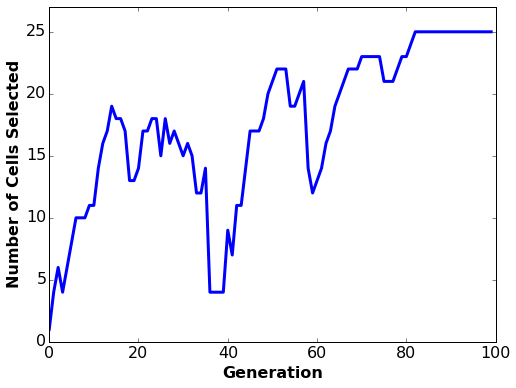

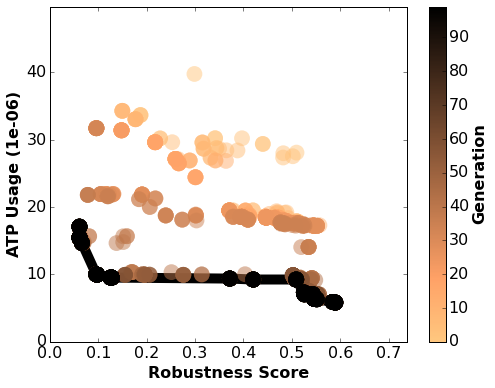

In [82]:
# plot population size
ax = plot_pareto_front_size(results)

# plot 2D evolutionary trajectory
ax = plot_2D_trajectory(results, obj=(0, 1), connect_front=True, labels=['Robustness Score', 'ATP Usage'])
# ax.set_ylim(4.6e7, 4.8e7)
ax.set_yscale('linear')

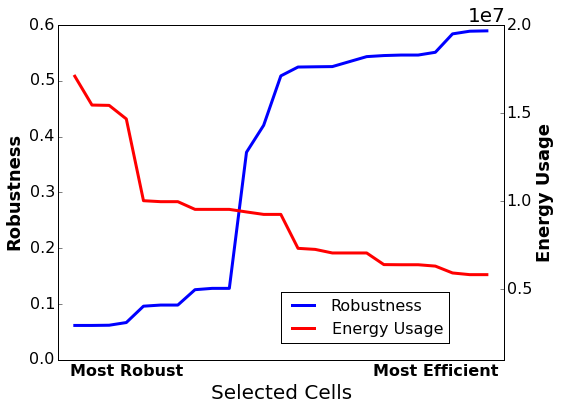

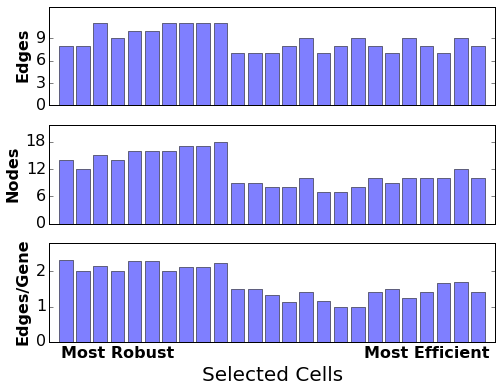

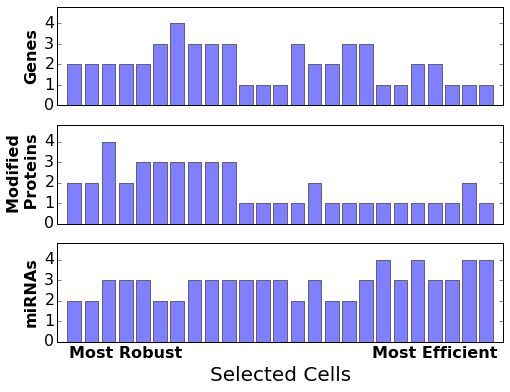

In [103]:
# get topological features from pareto front, ordered from most robust to most efficient
network_size, node_types, edge_types = get_topology_from_front(results)
    
# plot objective function scores vs position on pareto front
ax0, ax1 = plot_pareto_objective_tradeoff(metrics=[robustness, energy_usage], metric_names=['Robustness', 'Energy Usage'])
ax1.set_ylim(0.1e7, 2e7)    
ax0.legend(loc=(0.5, 0.05), prop={'size': 16})
_ = ax1.yaxis.get_offset_text().set_size(20)


# plot network size distributions along front
ax2, ax3, ax4 = create_subplot_figure(dim=(3, 1), size=(8, 6))
plot_multiple_metrics(ax2, network_size['node_count'], metric_name='Edges', include_axis_label=False)
plot_multiple_metrics(ax3, network_size['edge_count'], metric_name='Nodes', include_axis_label=False)
plot_multiple_metrics(ax4, network_size['edges_per_gene'], metric_name='Edges/Gene', include_axis_label=True)

# plot node type distributions along front
ax5, ax6, ax7 = create_subplot_figure(dim=(3, 1), size=(8, 6))
plot_multiple_metrics(ax5, node_types['genes'], metric_name='Genes', include_axis_label=False)
plot_multiple_metrics(ax6, node_types['modified_proteins'], metric_name='Modified \n Proteins', include_axis_label=False)
plot_multiple_metrics(ax7, node_types['micro_rnas'], metric_name='miRNAs', include_axis_label=True)

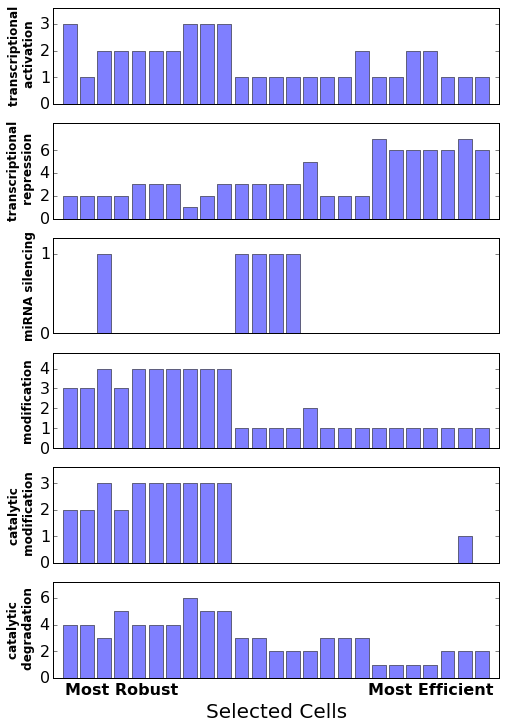

In [110]:
# plot edge type distributions along front

axes = create_subplot_figure(dim=(len(edge_types), 1), size=(8, 12))
plot_multiple_metrics(axes[0], edge_types['TA'], metric_name='transcriptional \n activation', include_axis_label=False)
plot_multiple_metrics(axes[1], edge_types['TR'], metric_name='transcriptional \n repression', include_axis_label=False)
plot_multiple_metrics(axes[2], edge_types['PTR'], metric_name='miRNA silencing', include_axis_label=False)
plot_multiple_metrics(axes[3], edge_types['M'], metric_name='modification', include_axis_label=False)
plot_multiple_metrics(axes[4], edge_types['CM'], metric_name='catalytic \n modification', include_axis_label=False)
plot_multiple_metrics(axes[5], edge_types['CD'], metric_name='catalytic \n degradation', include_axis_label=True)


In [ ]:
# plot edge type count vs rank
# plot downregulating edges  per input and downreg pet output on same pareto axis

In [ ]:
# analyze a single cell

# select a cell from the population
cell_num = 0
cell = list(results[len(results)-1].items())[cell_num][0]

# check it's steady state simulation results
steady_states = cell.get_steady_states(input_node=2, input_magnitude=1)
cell.plot_steady_states(input_node=2, input_magnitude=1, output_node=1)
ax = plt.gca()
ax.plot([0, 100], [steady_states[cell.key[1]], steady_states[cell.key[1]]], '--b', linewidth=3, label='Steady State')

# check its interaction test results
_ = cell.interaction_check_numerical(input_node=2, output_node=1, steady_states=steady_states, plot=True)
ax = plt.gca()
ax.plot([0, 100], [steady_states[cell.key[1]], steady_states[cell.key[1]]], '--r', linewidth=3, label='Pre-Input')
ax.legend(loc=0)

# generate table of all reactions and modifications
cell.show_reactions(grn_indices=True)

# generate network graph
cell.show_topology(input_node=2, output_node=1)

# run adaptation test
score, energy = adaptation_test(cell, input_node=2, output_node=1, input_random=False, plot=True)

# run robustness test
scores = robustness_test(cell, num_mutants=10, input_node=2, output_node=1, steady_states=None, plot=True)

In [ ]:
# select a cell from the population
cell_num = 10
cell = list(results[len(results)-1].items())[cell_num][0]

# run adaptation test
score, energy = adaptation_test(cell, input_node=2, output_node=1, input_random=False, plot=True)

In [90]:
cell = list(results[len(results)-1].items())[1][0]

edges, nodes, key = cell.get_topology()

print(edges)


[(1, 0, 'activation'), (8, 0, 'repression'), (7, 0, 'repression'), (7, 4, 'activation'), (0, 4, 'repression'), (1, 7, 'modification'), (0, 8, 'modification'), (0, 1, 'catalytic_degradation'), (8, 0, 'catalytic_modification'), (8, 0, 'catalytic_modification'), (7, 1, 'modification'), (0, 1, 'catalytic_degradation'), (7, 0, 'catalytic_degradation'), (2, 3, 'catalytic_degradation'), (8, 0, 'catalytic_modification'), (3, 9, 'modification')]


[autoreload of modules.analysis failed: Traceback (most recent call last):
  File "//anaconda/lib/python3.4/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "/Users/Sebi/Documents/GradSchool/Evolution_of_GRNs/Evolution_of_GRN/modules/analysis.py", line 239
    return robustness, energy_usage, edge_count, node_count, edges_per_node, edges_per_gene
    ^
IndentationError: unexpected indent
]


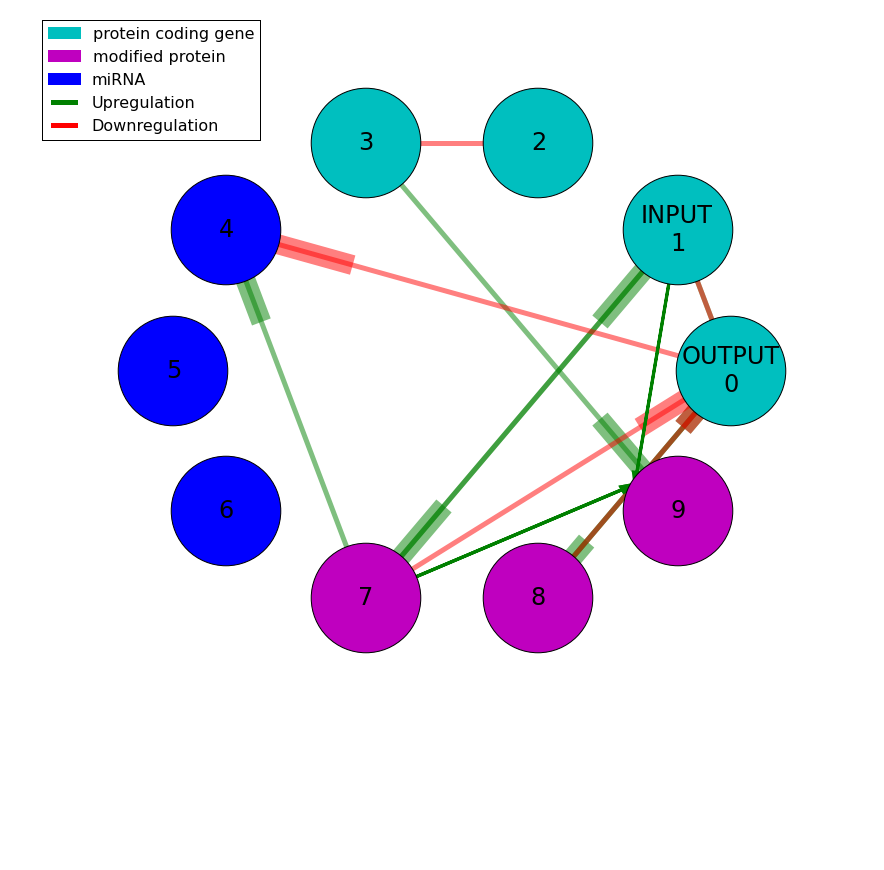

In [91]:
cell.show_topology(input_node=2, output_node=1)

In [121]:
cell_num = 0
results[len(results)-1]

{<modules.cells.Cell at 0x109815400>: [0.5246523843224539, 7325528.436885088],
 <modules.cells.Cell at 0x10987fc18>: [0.09609573510227774,
  10028952.958570981],
 <modules.cells.Cell at 0x109814438>: [0.5254731481353565, 7062453.160151647],
 <modules.cells.Cell at 0x10980d470>: [0.5433281236611776, 7062428.662402259],
 <modules.cells.Cell at 0x109826ac8>: [0.06157755917111609,
  17092934.998528957],
 <modules.cells.Cell at 0x1098039b0>: [0.5344009870731254, 7062435.506847764],
 <modules.cells.Cell at 0x10987f518>: [0.5461422521572555, 6394491.968306182],
 <modules.cells.Cell at 0x10980e940>: [0.525100723543399, 7265900.703522129],
 <modules.cells.Cell at 0x109814d68>: [0.5840936127041846, 5927853.785060266],
 <modules.cells.Cell at 0x10976d588>: [0.1280203377497914, 9536544.38259708],
 <modules.cells.Cell at 0x10987cda0>: [0.5088191123292927, 9251532.64582613],
 <modules.cells.Cell at 0x10981b9b0>: [0.1256398812549268, 9537417.868547954],
 <modules.cells.Cell at 0x10976d5c0>: [0.098094

In [123]:
results[len(results)-1]

{<modules.cells.Cell at 0x109815400>: [0.5246523843224539, 7325528.436885088],
 <modules.cells.Cell at 0x10987fc18>: [0.09609573510227774,
  10028952.958570981],
 <modules.cells.Cell at 0x109814438>: [0.5254731481353565, 7062453.160151647],
 <modules.cells.Cell at 0x10980d470>: [0.5433281236611776, 7062428.662402259],
 <modules.cells.Cell at 0x109826ac8>: [0.06157755917111609,
  17092934.998528957],
 <modules.cells.Cell at 0x1098039b0>: [0.5344009870731254, 7062435.506847764],
 <modules.cells.Cell at 0x10987f518>: [0.5461422521572555, 6394491.968306182],
 <modules.cells.Cell at 0x10980e940>: [0.525100723543399, 7265900.703522129],
 <modules.cells.Cell at 0x109814d68>: [0.5840936127041846, 5927853.785060266],
 <modules.cells.Cell at 0x10976d588>: [0.1280203377497914, 9536544.38259708],
 <modules.cells.Cell at 0x10987cda0>: [0.5088191123292927, 9251532.64582613],
 <modules.cells.Cell at 0x10981b9b0>: [0.1256398812549268, 9537417.868547954],
 <modules.cells.Cell at 0x10976d5c0>: [0.098094

Reaction Type           Reactants    Enzymes    Products
----------------------  -----------  ---------  ----------
modification            [1]          []         [6]
modification            [0]          []         [7]
catalytic_degradation   [1]          [0]        []
catalytic_modification  [7]          [6]        [0]
catalytic_modification  [7]          [6]        [0]
modification            [6]          []         [1]
catalytic_degradation   [1]          [0]        []
catalytic_degradation   [0]          [6]        []
catalytic_degradation   [3]          [6]        []


Regulation Type      Target Gene    Transcription Factor
-----------------  -------------  ----------------------
activation                     0                       1
activation                     2                       0
activation                     3                       3


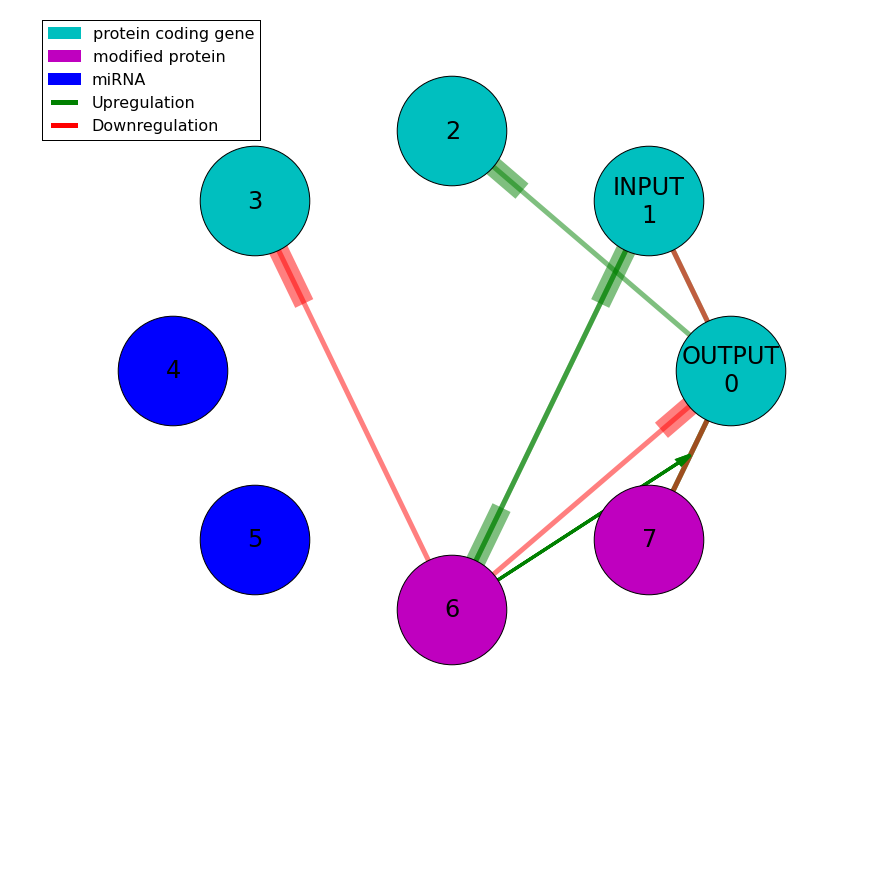

In [9]:
cells, scores = get_ordered_front(results)

cells[0].show_topology(input_node=2, output_node=1)
cells[0].show_reactions(grn_indices=True, input_node=2)

In [134]:
# for i, cell in enumerate(cells):
#     print(i)
#     print(scores[i])

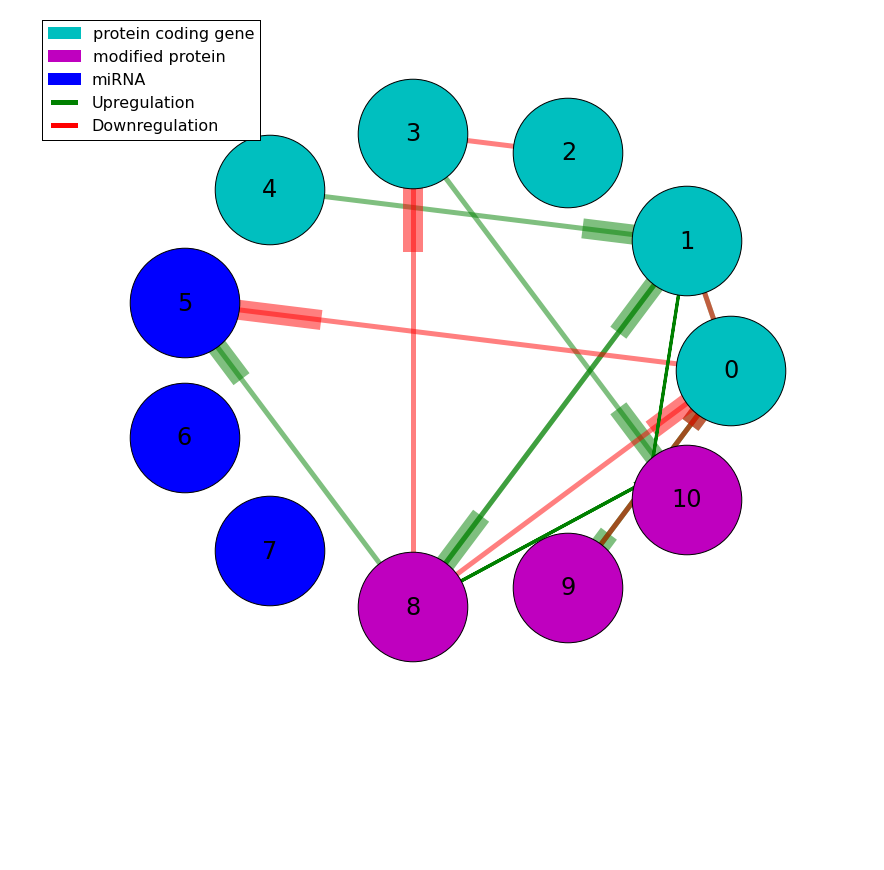

In [135]:
cells[9].show_topology()

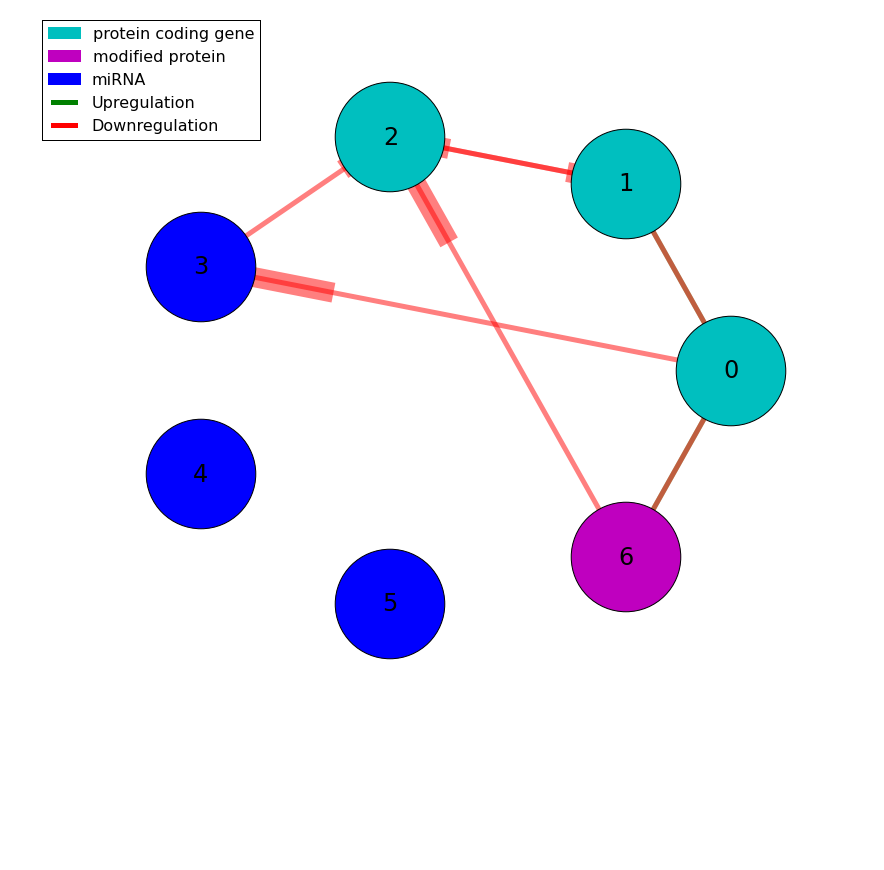

In [136]:
cells[10].show_topology()

[0.49861670260128765, 9390197.4401172679]

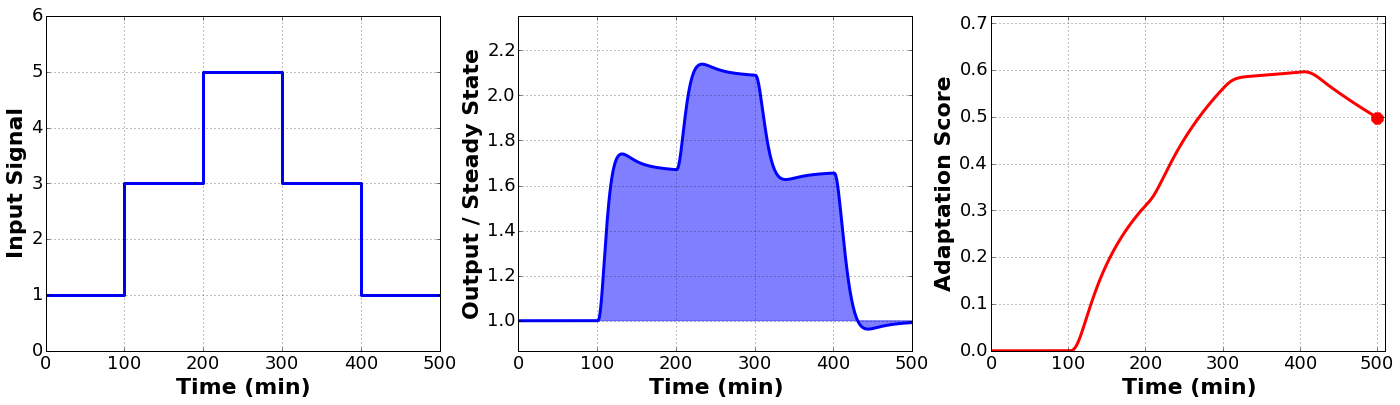

In [21]:
current_cell = cells[10]

adaptation_test(current_cell, input_node=2, output_node=1, input_random=False, plot=True)

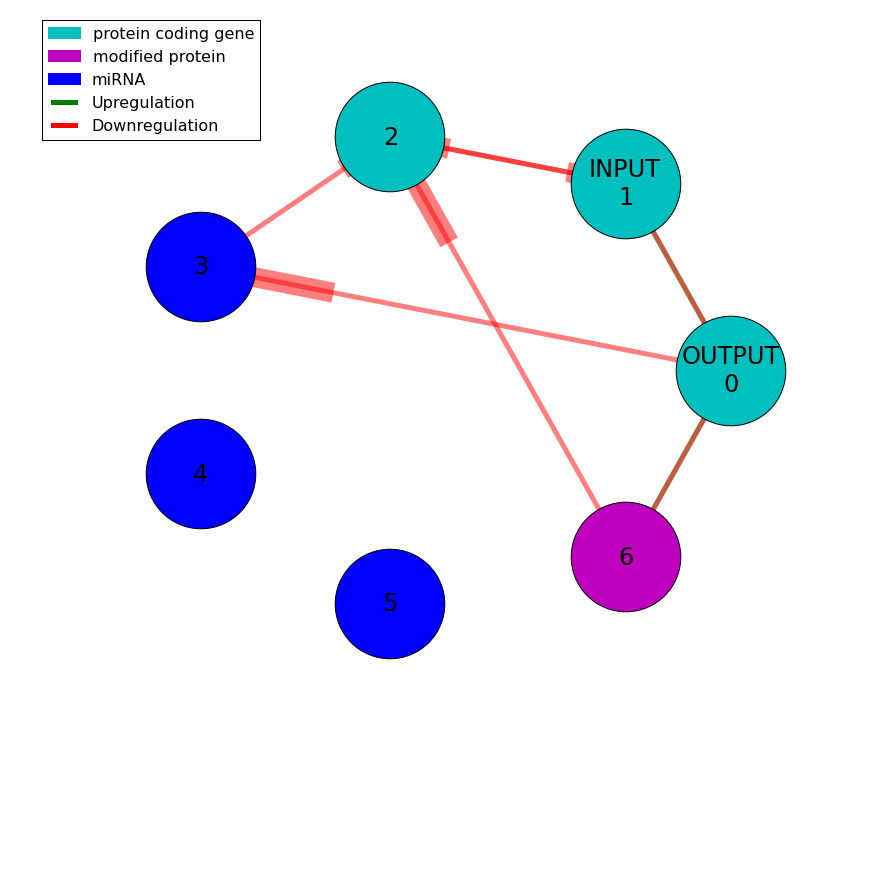

In [22]:
current_cell.show_topology(input_node=2, output_node=1)

In [23]:
current_cell.show_reactions(grn_indices=True, input_node=2)

Reaction Type          Reactants    Enzymes    Products
---------------------  -----------  ---------  ----------
modification           [0]          []         [6]
catalytic_degradation  [1]          [0]        []
miRNA_silencing        [3, 2]       []         []
catalytic_degradation  [2]          [6]        []
catalytic_degradation  [1]          [2]        []


Regulation Type      Target Gene    Transcription Factor
-----------------  -------------  ----------------------
activation                     0                       1
repression                     3                       0
repression                     2                       1
